# Bayes Network with pyAgrum

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.explain as explain
import pyAgrum.lib.image as gumimage

from sklearn.preprocessing import StandardScaler

## Client 3

In [2]:
def preprocess_data(data):
    rows = []
    for ip, stats in data.items():
        for index, values in stats.items():
            values['IP'] = ip
            values['bin_index'] = index
            rows.append(values)
    
    # Create the DataFrame
    df = pd.DataFrame(rows)

    # Reorder_columns
    column_order = ['IP', 'bin_index'] + [col for col in df.columns if col not in ['IP', 'bin_index']]
    df = df[column_order]

    # Drop first bins (might want to drop the last too)
    df = df.drop(df[df['bin_index'] == 0].index)
    df = df.drop(df[df['bin_index'] == 19].index)
    df = df.reset_index(drop=True)
    
    return df

In [4]:
with open('../data/pickle_files/hdumb_3_false_bins1.pkl', 'rb') as file:
    data = pickle.load(file)
with open('../data/pickle_files/hdumb_3_false_bins2.pkl', 'rb') as file:
    data2 = pickle.load(file)
with open('../data/pickle_files/hdumb_3_false_bins3.pkl', 'rb') as file:
    data3 = pickle.load(file)

df1 = preprocess_data(data)
df2 = preprocess_data(data2)
df3 = preprocess_data(data3)

std_outgoing_bytes >= 20 --> is_talking

In [5]:
df_combined = pd.concat([df1, df2, df3])

In [6]:
# Create a target variable
df_combined['is_speaking'] = 0  # Initialize the column with 0 for all rows

df_filtered = df_combined[df_combined['IP'] == '10.0.1.1']
df_filtered.loc[df_filtered['std_outgoing_bytes'] >= 20, 'is_speaking'] = 1
df_filtered

,IP,bin_index,total_bytes_incoming,total_bytes_outgoing,incoming_packets,outgoing_packets,sum_inter_arrival_incoming,count_inter_arrival_incoming,sum_inter_arrival_outgoing,count_inter_arrival_outgoing,...,std_incoming_bytes,median_incoming_bytes,packet_frequency_incoming,average_inter_arrival_incoming,average_outgoing_bytes,std_outgoing_bytes,median_outgoing_bytes,packet_frequency_outgoing,average_inter_arrival_outgoing,is_speaking
0,10.0.1.1,1,86779,39866,943,532,9.998707,943,10.012674,532,...,26.879112,79.0,94.3,0.010603,74.936090,8.767538,75.0,53.2,0.018821,0
1,10.0.1.1,2,79904,39474,834,529,9.999061,834,9.985281,529,...,28.227835,99.0,83.4,0.011989,74.620038,8.419250,76.0,52.9,0.018876,0
2,10.0.1.1,3,70648,38976,704,535,10.003702,704,10.011403,535,...,29.309275,113.0,70.4,0.014210,72.852336,21.458231,72.0,53.5,0.018713,1
3,10.0.1.1,4,40509,51054,457,531,9.991360,457,10.001567,531,...,30.115973,82.0,45.7,0.021863,96.146893,26.736822,86.0,53.1,0.018835,1
4,10.0.1.1,5,22666,58063,325,533,10.007949,325,9.991512,533,...,16.718649,77.0,32.5,0.030794,108.936210,25.429980,119.0,53.3,0.018746,1
5,10.0.1.1,6,29625,58348,413,530,10.000702,413,9.996488,530,...,15.554256,77.0,41.3,0.024215,110.090566,24.037292,119.0,53.0,0.018861,1
6,10.0.1.1,7,56455,60134,768,533,9.960642,768,10.001882,533,...,11.413865,77.0,76.8,0.012970,112.821764,22.746315,120.0,53.3,0.018765,1
7,10.0.1.1,8,37122,58329,519,529,10.031033,519,9.997895,529,...,13.237903,77.0,51.9,0.019328,110.262760,24.168383,120.0,52.9,0.018900,1
8,10.0.1.1,9,42909,60417,587,534,9.994147,587,9.997244,534,...,13.078019,77.0,58.7,0.017026,113.140449,22.623290,120.0,53.4,0.018721,1
9,10.0.1.1,10,70109,46035,770,532,10.016382,770,10.013642,532,...,27.067729,79.0,77.0,0.013008,86.531955,23.533222,76.0,53.2,0.018823,1


- avearge, total, median outgoing bytes are significantly graeter when a client is talking
- number of packets and packet inter-arrival time stay the same for the entire session
- std outgoing bytes appears to represent talking behavior the best

In [7]:
client2 = df_combined[df_combined['IP'] == '10.0.2.1']
client3 = df_combined[df_combined['IP'] == '10.0.3.1']
df_filtered['client23_total_bytes_outgoing'] = client3['total_bytes_outgoing'].values + client2['total_bytes_outgoing'].values
df_filtered = df_filtered[['total_bytes_outgoing', 'total_bytes_incoming', 'client23_total_bytes_outgoing', 'is_speaking']]
df_filtered.head()

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_3692/2665123400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['client23_total_bytes_outgoing'] = client3['total_bytes_outgoing'].values + client2['total_bytes_outgoing'].values


,total_bytes_outgoing,total_bytes_incoming,client23_total_bytes_outgoing,is_speaking
0,39866,86779,97289,0
1,39474,79904,98213,0
2,38976,70648,98507,1
3,51054,40509,86619,1
4,58063,22666,78472,1


### The main idea

In [3]:
bn=gum.fastBN("total_outgoing_bytes->is_talking<-total_incoming_bytes<-other_clients_total_outgoing_bytes")
bn

(pyAgrum.BayesNet<double>@0x10384dc00) BN{nodes: 4, arcs: 3, domainSize: 16, dim: 8, mem: 128o}

In [5]:
gumimage.export(bn,"network_example.png")

#### Discretization

In [9]:
df_filtered['total_bytes_outgoing'] = pd.cut(df_filtered['total_bytes_outgoing'], 2, labels=[0, 1])
df_filtered['total_bytes_incoming'] = pd.cut(df_filtered['total_bytes_incoming'], 2, labels=[0, 1])
df_filtered['client23_total_bytes_outgoing'] = pd.cut(df_filtered['client23_total_bytes_outgoing'], 2, labels=[0, 1])
df_filtered.head()

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_3692/514104908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_bytes_outgoing'] = pd.cut(df_filtered['total_bytes_outgoing'], 2, labels=[0, 1])
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_3692/514104908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_bytes_incoming'] = pd.cut(df_filtered['total_bytes_incoming'], 2, labels=[0, 1])
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_3

,total_bytes_outgoing,total_bytes_incoming,client23_total_bytes_outgoing,is_speaking
0,0,1,1,0
1,0,1,1,0
2,0,1,1,1
3,1,0,0,1
4,1,0,0,1


In [10]:
bn = gum.BayesNet('Net')

# Add nodes
tbo = bn.add(gum.LabelizedVariable('total_bytes_outgoing', '', df_filtered['total_bytes_outgoing'].nunique()))
tbi = bn.add(gum.LabelizedVariable('total_bytes_incoming', '', df_filtered['total_bytes_incoming'].nunique()))
c23tbo = bn.add(gum.LabelizedVariable('client23_total_bytes_outgoing', '', df_filtered['client23_total_bytes_outgoing'].nunique()))
is_spk = bn.add(gum.LabelizedVariable('is_speaking', '', 2)) # Assuming 'is_speaking' is binary

# Define the structure of the network manually (this should be based on your domain knowledge)
bn.addArc(c23tbo, tbi)
bn.addArc(tbo, is_spk)
bn.addArc(tbi, is_spk)

# Use BNLearner to learn the parameters from the CSV data
learner = gum.BNLearner(df_filtered, bn)
learner.useSmoothingPrior()
bn = learner.learnParameters(bn.dag())

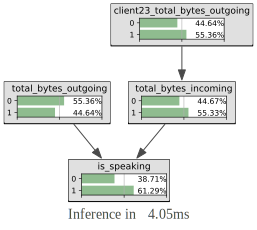

In [11]:
gnb.showInference(bn,evs={})

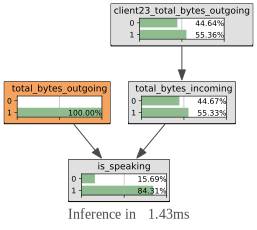

In [12]:
gnb.showInference(bn,evs={'total_bytes_outgoing': 1})

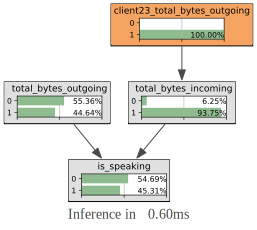

In [13]:
gnb.showInference(bn,evs={'client23_total_bytes_outgoing': 1})

## Client 5

In [14]:
with open('../data/pickle_files/hdumb_5_false_bins1.pkl', 'rb') as file:
    data_5 = pickle.load(file)
with open('../data/pickle_files/hdumb_5_false_bins2.pkl', 'rb') as file:
    data_5_2 = pickle.load(file)
with open('../data/pickle_files/hdumb_5_false_bins3.pkl', 'rb') as file:
    data_5_3 = pickle.load(file)

df5_1 = preprocess_data(data_5)
df5_2 = preprocess_data(data_5_2)
df5_3 = preprocess_data(data_5_3)

In [15]:
df_combined_5 = pd.concat([df5_1, df5_2, df5_3])

In [16]:
df_combined_5['is_speaking'] = 0  # Initialize the column with 0 for all rows

df_filtered_5 = df_combined_5[df_combined_5['IP'] == '10.0.1.1']
df_filtered_5.loc[df_filtered_5['std_outgoing_bytes'] >= 20, 'is_speaking'] = 1
df_filtered_5

,IP,bin_index,total_bytes_incoming,total_bytes_outgoing,incoming_packets,outgoing_packets,sum_inter_arrival_incoming,count_inter_arrival_incoming,sum_inter_arrival_outgoing,count_inter_arrival_outgoing,...,std_incoming_bytes,median_incoming_bytes,packet_frequency_incoming,average_inter_arrival_incoming,average_outgoing_bytes,std_outgoing_bytes,median_outgoing_bytes,packet_frequency_outgoing,average_inter_arrival_outgoing,is_speaking
0,10.0.1.1,1,109030,59281,1286,537,9.967658,1286,9.998009,537,...,23.187361,77.0,128.6,0.007751,110.392924,24.108124,119.0,53.7,0.018618,1
1,10.0.1.1,2,118455,60858,1390,537,10.011198,1390,9.999053,537,...,22.716776,77.0,139.0,0.007202,113.329609,22.653649,121.0,53.7,0.018620,1
2,10.0.1.1,3,66670,58393,820,534,10.020594,820,9.997652,534,...,23.526925,77.0,82.0,0.012220,109.350187,24.522055,118.0,53.4,0.018722,1
3,10.0.1.1,4,58059,59886,733,534,9.985376,733,9.995912,534,...,22.316602,77.0,73.3,0.013623,112.146067,22.543958,120.0,53.4,0.018719,1
4,10.0.1.1,5,37106,58945,483,537,10.005664,483,10.005954,537,...,23.861636,77.0,48.3,0.020716,109.767225,25.218075,119.0,53.7,0.018633,1
5,10.0.1.1,6,58922,60841,755,531,10.002117,755,9.999083,531,...,20.292642,77.0,75.5,0.013248,114.578154,21.055610,121.0,53.1,0.018831,1
6,10.0.1.1,7,46638,60413,565,534,9.898056,565,9.989964,534,...,27.244366,77.0,56.5,0.017519,113.132959,23.007689,121.0,53.4,0.018708,1
7,10.0.1.1,8,65669,59074,809,533,10.114521,809,10.009212,533,...,23.253068,77.0,80.9,0.012502,110.833021,24.051251,120.0,53.3,0.018779,1
8,10.0.1.1,9,84627,52584,954,533,9.992565,954,9.987487,533,...,27.373201,78.0,95.4,0.010474,98.656660,25.622702,98.0,53.3,0.018738,1
9,10.0.1.1,10,119125,40253,1206,538,9.998869,1206,10.019357,538,...,28.203308,106.5,120.6,0.008291,74.819703,9.314844,75.0,53.8,0.018623,0


In [17]:
client2 = df_combined_5[df_combined_5['IP'] == '10.0.2.1']
client3 = df_combined_5[df_combined_5['IP'] == '10.0.3.1']
client4 = df_combined_5[df_combined_5['IP'] == '10.0.4.1']
client5 = df_combined_5[df_combined_5['IP'] == '10.0.5.1']
df_filtered_5['client2345_total_bytes_outgoing'] = client3['total_bytes_outgoing'].values + client2['total_bytes_outgoing'].values + client4['total_bytes_outgoing'].values + client5['total_bytes_outgoing'].values
df_filtered_5 = df_filtered_5[['total_bytes_outgoing', 'total_bytes_incoming', 'client2345_total_bytes_outgoing', 'is_speaking']]
df_filtered_5.head()

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_3692/4034701608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_5['client2345_total_bytes_outgoing'] = client3['total_bytes_outgoing'].values + client2['total_bytes_outgoing'].values + client4['total_bytes_outgoing'].values + client5['total_bytes_outgoing'].values


,total_bytes_outgoing,total_bytes_incoming,client2345_total_bytes_outgoing,is_speaking
0,59281,109030,166848,1
1,60858,118455,169540,1
2,58393,66670,153084,1
3,59886,58059,149296,1
4,58945,37106,145709,1


In [18]:
df_filtered_5['total_bytes_outgoing'] = pd.cut(df_filtered_5['total_bytes_outgoing'], 2, labels=[0, 1])
df_filtered_5['total_bytes_incoming'] = pd.cut(df_filtered_5['total_bytes_incoming'], 2, labels=[0, 1])
df_filtered_5['client2345_total_bytes_outgoing'] = pd.cut(df_filtered_5['client2345_total_bytes_outgoing'], 2, labels=[0, 1])
df_filtered_5.head()

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_3692/2457549549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_5['total_bytes_outgoing'] = pd.cut(df_filtered_5['total_bytes_outgoing'], 2, labels=[0, 1])
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_3692/2457549549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_5['total_bytes_incoming'] = pd.cut(df_filtered_5['total_bytes_incoming'], 2, labels=[0, 1])
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/i

,total_bytes_outgoing,total_bytes_incoming,client2345_total_bytes_outgoing,is_speaking
0,1,1,1,1
1,1,1,1,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1


In [19]:
bn = gum.BayesNet('Net')

# Add nodes
tbo = bn.add(gum.LabelizedVariable('total_bytes_outgoing', '', df_filtered_5['total_bytes_outgoing'].nunique()))
tbi = bn.add(gum.LabelizedVariable('total_bytes_incoming', '', df_filtered_5['total_bytes_incoming'].nunique()))
c23tbo = bn.add(gum.LabelizedVariable('client2345_total_bytes_outgoing', '', df_filtered_5['client2345_total_bytes_outgoing'].nunique()))
is_spk = bn.add(gum.LabelizedVariable('is_speaking', '', 2)) # Assuming 'is_speaking' is binary

# Define the structure of the network manually (this should be based on your domain knowledge)
bn.addArc(c23tbo, tbi)
bn.addArc(tbo, is_spk)
bn.addArc(tbi, is_spk)

# Use BNLearner to learn the parameters from the CSV data
learner = gum.BNLearner(df_filtered_5, bn)
learner.useSmoothingPrior()
bn = learner.learnParameters(bn.dag())

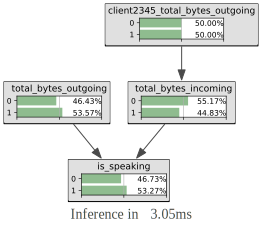

In [20]:
gnb.showInference(bn,evs={})

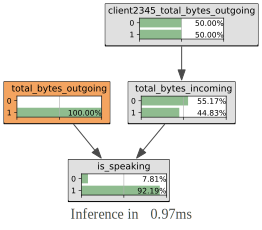

In [21]:
gnb.showInference(bn,evs={'total_bytes_outgoing': 1})

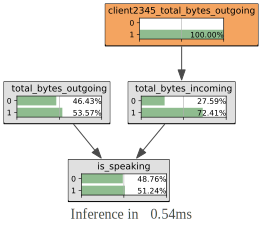

In [22]:
gnb.showInference(bn,evs={'client2345_total_bytes_outgoing': 1})

## Client 8

In [23]:
with open('../data/pickle_files/hdumb_8_false_bins1.pkl', 'rb') as file:
    data_8 = pickle.load(file)
with open('../data/pickle_files/hdumb_8_false_bins2.pkl', 'rb') as file:
    data_8_2 = pickle.load(file)
with open('../data/pickle_files/hdumb_8_false_bins3.pkl', 'rb') as file:
    data_8_3 = pickle.load(file)

df8_1 = preprocess_data(data_8)
df8_2 = preprocess_data(data_8_2)
df8_3 = preprocess_data(data_8_3)
df_combined_8 = pd.concat([df8_1, df8_2, df8_3])

In [24]:
df_combined_8['is_speaking'] = 0  # Initialize the column with 0 for all rows

df_filtered_8 = df_combined_8[df_combined_8['IP'] == '10.0.1.1']
df_filtered_8.loc[df_filtered_8['std_outgoing_bytes'] >= 20, 'is_speaking'] = 1

In [25]:
client2 = df_combined_8[df_combined_8['IP'] == '10.0.2.1']
client3 = df_combined_8[df_combined_8['IP'] == '10.0.3.1']
client4 = df_combined_8[df_combined_8['IP'] == '10.0.4.1']
client5 = df_combined_8[df_combined_8['IP'] == '10.0.5.1']
client6 = df_combined_8[df_combined_8['IP'] == '10.0.6.1']
client7 = df_combined_8[df_combined_8['IP'] == '10.0.7.1']
client8 = df_combined_8[df_combined_8['IP'] == '10.0.8.1']
df_filtered_8['client2345_total_bytes_outgoing'] = client3['total_bytes_outgoing'].values + client2['total_bytes_outgoing'].values + client4['total_bytes_outgoing'].values + client5['total_bytes_outgoing'].values + client6['total_bytes_outgoing'].values + client7['total_bytes_outgoing'].values + client8['total_bytes_outgoing'].values 
df_filtered_8 = df_filtered_8[['total_bytes_outgoing', 'total_bytes_incoming', 'client2345_total_bytes_outgoing', 'is_speaking']]
df_filtered_8.head()

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_3692/880110384.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_8['client2345_total_bytes_outgoing'] = client3['total_bytes_outgoing'].values + client2['total_bytes_outgoing'].values + client4['total_bytes_outgoing'].values + client5['total_bytes_outgoing'].values + client6['total_bytes_outgoing'].values + client7['total_bytes_outgoing'].values + client8['total_bytes_outgoing'].values


,total_bytes_outgoing,total_bytes_incoming,client2345_total_bytes_outgoing,is_speaking
0,40339,248011,316623,0
1,39041,176902,309048,0
2,39524,191286,305906,0
3,38918,101134,287519,0
4,38670,114291,294038,0


In [26]:
df_filtered_8['total_bytes_outgoing'] = pd.cut(df_filtered_8['total_bytes_outgoing'], 2, labels=[0, 1])
df_filtered_8['total_bytes_incoming'] = pd.cut(df_filtered_8['total_bytes_incoming'], 2, labels=[0, 1])
df_filtered_8['client2345_total_bytes_outgoing'] = pd.cut(df_filtered_8['client2345_total_bytes_outgoing'], 2, labels=[0, 1])
df_filtered_8.head()

,total_bytes_outgoing,total_bytes_incoming,client2345_total_bytes_outgoing,is_speaking
0,0,1,1,0
1,0,1,1,0
2,0,1,1,0
3,0,0,0,0
4,0,0,0,0


In [27]:
bn = gum.BayesNet('Net')

# Add nodes
tbo = bn.add(gum.LabelizedVariable('total_bytes_outgoing', '', df_filtered_8['total_bytes_outgoing'].nunique()))
tbi = bn.add(gum.LabelizedVariable('total_bytes_incoming', '', df_filtered_8['total_bytes_incoming'].nunique()))
c23tbo = bn.add(gum.LabelizedVariable('client2345_total_bytes_outgoing', '', df_filtered_8['client2345_total_bytes_outgoing'].nunique()))
is_spk = bn.add(gum.LabelizedVariable('is_speaking', '', 2)) # Assuming 'is_speaking' is binary

# Define the structure of the network manually (this should be based on your domain knowledge)
bn.addArc(c23tbo, tbi)
bn.addArc(tbo, is_spk)
bn.addArc(tbi, is_spk)

# Use BNLearner to learn the parameters from the CSV data
learner = gum.BNLearner(df_filtered_8, bn)
learner.useSmoothingPrior()
bn = learner.learnParameters(bn.dag())

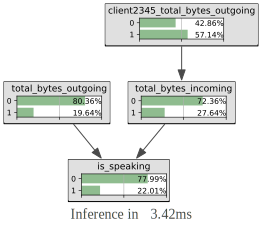

In [28]:
gnb.showInference(bn,evs={})

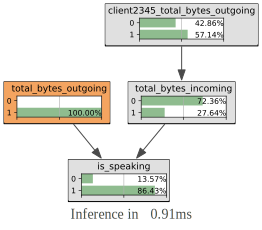

In [29]:
gnb.showInference(bn,evs={'total_bytes_outgoing': 1})

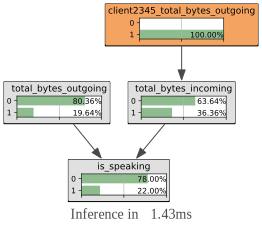

In [30]:
gnb.showInference(bn,evs={'client2345_total_bytes_outgoing': 1})

## Client 3 Experiment

### 10.0.2.1 As a Target

In [31]:
df_combined = pd.concat([df1, df2, df3])

In [32]:
# Create a target variable
df_combined['is_speaking'] = 0  # Initialize the column with 0 for all rows

df_filtered = df_combined[df_combined['IP'] == '10.0.2.1']
df_filtered.loc[df_filtered['std_outgoing_bytes'] >= 20, 'is_speaking'] = 1
df_filtered.head()

,IP,bin_index,total_bytes_incoming,total_bytes_outgoing,incoming_packets,outgoing_packets,sum_inter_arrival_incoming,count_inter_arrival_incoming,sum_inter_arrival_outgoing,count_inter_arrival_outgoing,...,std_incoming_bytes,median_incoming_bytes,packet_frequency_incoming,average_inter_arrival_incoming,average_outgoing_bytes,std_outgoing_bytes,median_outgoing_bytes,packet_frequency_outgoing,average_inter_arrival_outgoing,is_speaking
18,10.0.2.1,1,68913,57565,939,530,9.992070,939,9.999349,530,...,10.171626,76.0,93.9,0.010641,108.613208,23.513247,117.0,53.0,0.018867,1
19,10.0.2.1,2,48339,58826,663,532,10.000764,663,9.998999,532,...,11.884043,77.0,66.3,0.015084,110.575188,23.544484,119.0,53.2,0.018795,1
20,10.0.2.1,3,28043,59495,375,531,10.008637,375,10.000992,531,...,24.590120,77.0,37.5,0.026690,112.043315,22.487397,119.0,53.1,0.018834,1
21,10.0.2.1,4,48027,48048,511,530,9.995530,511,9.998507,530,...,30.996550,102.0,51.1,0.019561,90.656604,24.078538,78.0,53.0,0.018865,1
22,10.0.2.1,5,63905,39862,633,531,10.003775,633,9.995496,531,...,30.337520,116.0,63.3,0.015804,75.069680,8.940941,75.0,53.1,0.018824,0


In [33]:
client1 = df_combined[df_combined['IP'] == '10.0.1.1']
client3 = df_combined[df_combined['IP'] == '10.0.3.1']
df_filtered['client13_total_bytes_outgoing'] = client1['total_bytes_outgoing'].values + client2['total_bytes_outgoing'].values
df_filtered = df_filtered[['total_bytes_outgoing', 'total_bytes_incoming', 'client13_total_bytes_outgoing', 'is_speaking']]
df_filtered.head()

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_3692/2632621508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['client13_total_bytes_outgoing'] = client1['total_bytes_outgoing'].values + client2['total_bytes_outgoing'].values


,total_bytes_outgoing,total_bytes_incoming,client13_total_bytes_outgoing,is_speaking
18,57565,68913,93879,1
19,58826,48339,90885,1
20,59495,28043,83176,1
21,48048,48027,82789,1
22,39862,63905,113627,0


In [34]:
df_filtered['total_bytes_outgoing'] = pd.cut(df_filtered['total_bytes_outgoing'], 2, labels=[0, 1])
df_filtered['total_bytes_incoming'] = pd.cut(df_filtered['total_bytes_incoming'], 2, labels=[0, 1])
df_filtered['client13_total_bytes_outgoing'] = pd.cut(df_filtered['client13_total_bytes_outgoing'], 2, labels=[0, 1])
df_filtered.head()

,total_bytes_outgoing,total_bytes_incoming,client13_total_bytes_outgoing,is_speaking
18,1,1,0,1
19,1,0,0,1
20,1,0,0,1
21,0,0,0,1
22,0,1,1,0


In [35]:
bn = gum.BayesNet('Net')

# Add nodes
tbo = bn.add(gum.LabelizedVariable('total_bytes_outgoing', '', df_filtered['total_bytes_outgoing'].nunique()))
tbi = bn.add(gum.LabelizedVariable('total_bytes_incoming', '', df_filtered['total_bytes_incoming'].nunique()))
c23tbo = bn.add(gum.LabelizedVariable('client13_total_bytes_outgoing', '', df_filtered['client13_total_bytes_outgoing'].nunique()))
is_spk = bn.add(gum.LabelizedVariable('is_speaking', '', 2)) # Assuming 'is_speaking' is binary

# Define the structure of the network manually (this should be based on your domain knowledge)
bn.addArc(c23tbo, tbi)
bn.addArc(tbo, is_spk)
bn.addArc(tbi, is_spk)

# Use BNLearner to learn the parameters from the CSV data
learner = gum.BNLearner(df_filtered, bn)
learner.useSmoothingPrior()
bn = learner.learnParameters(bn.dag())

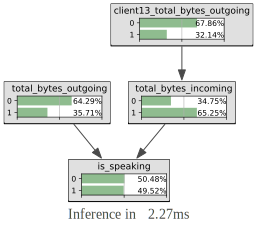

In [36]:
gnb.showInference(bn,evs={})

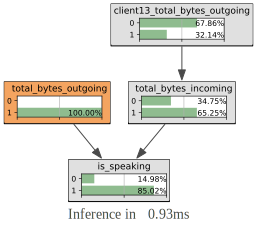

In [37]:
gnb.showInference(bn,evs={'total_bytes_outgoing': 1})

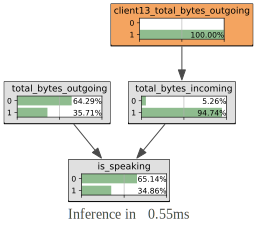

In [38]:
gnb.showInference(bn,evs={'client13_total_bytes_outgoing': 1})

### 10.0.3.1 As a Target

In [39]:
df_combined = pd.concat([df1, df2, df3])
# Create a target variable
df_combined['is_speaking'] = 0  # Initialize the column with 0 for all rows

df_filtered = df_combined[df_combined['IP'] == '10.0.3.1']
df_filtered.loc[df_filtered['std_outgoing_bytes'] >= 20, 'is_speaking'] = 1
df_filtered.head()

,IP,bin_index,total_bytes_incoming,total_bytes_outgoing,incoming_packets,outgoing_packets,sum_inter_arrival_incoming,count_inter_arrival_incoming,sum_inter_arrival_outgoing,count_inter_arrival_outgoing,...,std_incoming_bytes,median_incoming_bytes,packet_frequency_incoming,average_inter_arrival_incoming,average_outgoing_bytes,std_outgoing_bytes,median_outgoing_bytes,packet_frequency_outgoing,average_inter_arrival_outgoing,is_speaking
36,10.0.3.1,1,87632,39724,953,532,10.000942,953,9.992100,532,...,26.781288,80.0,95.3,0.010494,74.669173,8.787272,76.0,53.2,0.018782,0
37,10.0.3.1,2,78299,39387,810,530,9.997773,810,10.000688,530,...,28.206863,103.5,81.0,0.012343,74.315094,8.529320,75.0,53.0,0.018869,0
38,10.0.3.1,3,71037,39012,684,533,10.003199,684,10.009052,533,...,30.039619,116.0,68.4,0.014625,73.193246,8.232876,72.0,53.3,0.018779,0
39,10.0.3.1,4,69246,38571,680,531,9.971683,680,9.981245,531,...,29.299602,115.0,68.0,0.014664,72.638418,8.304645,72.0,53.1,0.018797,0
40,10.0.3.1,5,63843,38610,628,531,10.028103,628,10.017605,531,...,30.121412,116.0,62.8,0.015968,72.711864,8.451964,72.0,53.1,0.018866,0


In [40]:
client1 = df_combined[df_combined['IP'] == '10.0.1.1']
client2 = df_combined[df_combined['IP'] == '10.0.2.1']
df_filtered['client12_total_bytes_outgoing'] = client1['total_bytes_outgoing'].values + client2['total_bytes_outgoing'].values
df_filtered = df_filtered[['total_bytes_outgoing', 'total_bytes_incoming', 'client12_total_bytes_outgoing', 'is_speaking']]

df_filtered['total_bytes_outgoing'] = pd.cut(df_filtered['total_bytes_outgoing'], 2, labels=[0, 1])
df_filtered['total_bytes_incoming'] = pd.cut(df_filtered['total_bytes_incoming'], 2, labels=[0, 1])
df_filtered['client12_total_bytes_outgoing'] = pd.cut(df_filtered['client12_total_bytes_outgoing'], 2, labels=[0, 1])
df_filtered.head()

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_3692/890281782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['client12_total_bytes_outgoing'] = client1['total_bytes_outgoing'].values + client2['total_bytes_outgoing'].values


,total_bytes_outgoing,total_bytes_incoming,client12_total_bytes_outgoing,is_speaking
36,0,1,1,0
37,0,1,1,0
38,0,1,1,0
39,0,1,1,0
40,0,1,1,0


In [41]:
bn = gum.BayesNet('Net')

# Add nodes
tbo = bn.add(gum.LabelizedVariable('total_bytes_outgoing', '', df_filtered['total_bytes_outgoing'].nunique()))
tbi = bn.add(gum.LabelizedVariable('total_bytes_incoming', '', df_filtered['total_bytes_incoming'].nunique()))
c23tbo = bn.add(gum.LabelizedVariable('client12_total_bytes_outgoing', '', df_filtered['client12_total_bytes_outgoing'].nunique()))
is_spk = bn.add(gum.LabelizedVariable('is_speaking', '', 2)) # Assuming 'is_speaking' is binary

# Define the structure of the network manually (this should be based on your domain knowledge)
bn.addArc(c23tbo, tbi)
bn.addArc(tbo, is_spk)
bn.addArc(tbi, is_spk)

# Use BNLearner to learn the parameters from the CSV data
learner = gum.BNLearner(df_filtered, bn)
learner.useSmoothingPrior()
bn = learner.learnParameters(bn.dag())

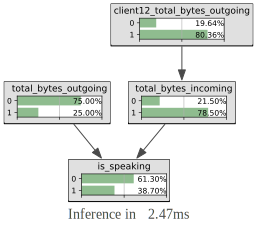

In [42]:
gnb.showInference(bn,evs={})

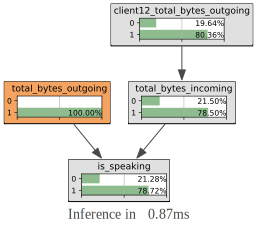

In [43]:
gnb.showInference(bn,evs={'total_bytes_outgoing': 1})

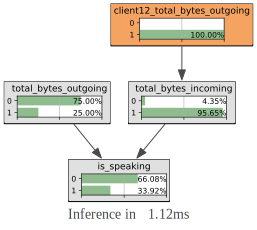

In [44]:
gnb.showInference(bn,evs={'client12_total_bytes_outgoing': 1})

### Generalize

In [45]:
df_combined = pd.concat([df1, df2, df3])
df_combined['is_speaking'] = 0

In [46]:
# Assuming df_combined is your initial DataFrame
client_ips = ['10.0.1.1', '10.0.2.1', '10.0.3.1']

df_generalized_list = []  # This will store the DataFrame slices for each client

for current_client_ip in client_ips:
    # Filter the DataFrame for the current client
    df_filtered = df_combined[df_combined['IP'] == current_client_ip].copy()
    
    # Set 'is_speaking' to 1 if the standard outgoing bytes threshold is reached
    df_filtered.loc[df_filtered['std_outgoing_bytes'] >= 20, 'is_speaking'] = 1
    
    # Initialize a column for 'client_rest_total_bytes_outgoing' with zeros
    df_filtered['client_rest_total_bytes_outgoing'] = 0
    
    for other_client_ip in client_ips:
        if other_client_ip != current_client_ip:
            # Add the outgoing bytes from the other client to the 'client_rest_total_bytes_outgoing' column
            df_filtered['client_rest_total_bytes_outgoing'] += df_combined[df_combined['IP'] == other_client_ip]['total_bytes_outgoing'].values[:len(df_filtered)]

    # Keep only the relevant columns
    df_filtered = df_filtered[['total_bytes_outgoing', 'average_outgoing_bytes', 'total_bytes_incoming', 'client_rest_total_bytes_outgoing', 'is_speaking']]
    
    # Append the processed DataFrame slice to the list
    df_generalized_list.append(df_filtered)

# Concatenate all the DataFrame slices into one DataFrame
df_generalized = pd.concat(df_generalized_list, ignore_index=True)

In [47]:
df_generalized['total_bytes_outgoing'] = pd.cut(df_generalized['total_bytes_outgoing'], 2, labels=[0, 1])
df_generalized['total_bytes_incoming'] = pd.cut(df_generalized['total_bytes_incoming'], 2, labels=[0, 1])
df_generalized['average_outgoing_bytes'] = pd.cut(df_generalized['average_outgoing_bytes'], 2, labels=[0, 1])
df_generalized['client_rest_total_bytes_outgoing'] = pd.cut(df_generalized['client_rest_total_bytes_outgoing'], 2, labels=[0, 1])
df_generalized

,total_bytes_outgoing,average_outgoing_bytes,total_bytes_incoming,client_rest_total_bytes_outgoing,is_speaking
0,0,0,1,1,0
1,0,0,1,1,0
2,0,0,1,1,1
3,1,1,0,0,1
4,1,1,0,0,1
...,...,...,...,...,...
157,0,0,1,1,0
158,0,0,1,1,0
159,0,0,1,1,0
160,0,0,1,1,0


In [48]:
bn = gum.BayesNet('Net')

# Add nodes
tbo = bn.add(gum.LabelizedVariable('total_bytes_outgoing', '', df_generalized['total_bytes_outgoing'].nunique()))
tbi = bn.add(gum.LabelizedVariable('total_bytes_incoming', '', df_generalized['total_bytes_incoming'].nunique()))
# abo = bn.add(gum.LabelizedVariable('average_outgoing_bytes', '', df_generalized['average_outgoing_bytes'].nunique()))
restbo = bn.add(gum.LabelizedVariable('client_rest_total_bytes_outgoing', '', df_generalized['client_rest_total_bytes_outgoing'].nunique()))
is_spk = bn.add(gum.LabelizedVariable('is_speaking', '', 2)) # Assuming 'is_speaking' is binary

# Define the structure of the network manually (this should be based on your domain knowledge)
bn.addArc(restbo, tbi)
bn.addArc(tbo, is_spk)
bn.addArc(tbi, is_spk)
# bn.addArc(abo, is_spk)

# Use BNLearner to learn the parameters from the CSV data
learner = gum.BNLearner(df_generalized, bn)
learner.useSmoothingPrior()
bn = learner.learnParameters(bn.dag())

In [49]:
explain.showInformation(bn,{},size="20")

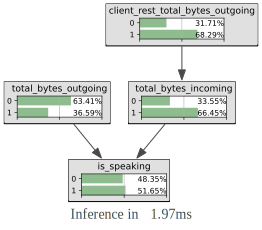

In [50]:
gnb.showInference(bn,evs={})

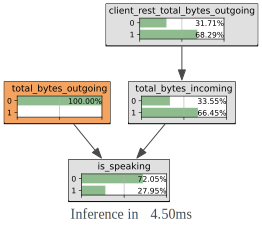

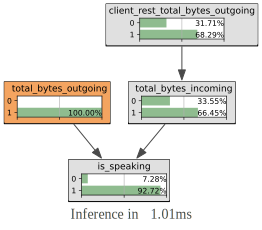

None,None


In [51]:
gnb.sideBySide(gnb.showInference(bn,evs={'total_bytes_outgoing': 0}), gnb.showInference(bn,evs={'total_bytes_outgoing': 1}))

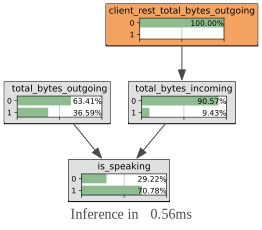

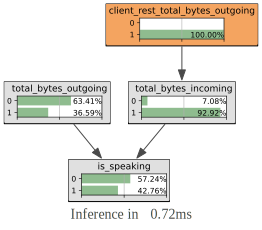

None,None


In [52]:
gnb.sideBySide(gnb.showInference(bn,evs={'client_rest_total_bytes_outgoing': 0}), gnb.showInference(bn,evs={'client_rest_total_bytes_outgoing': 1}))

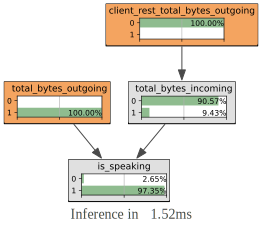

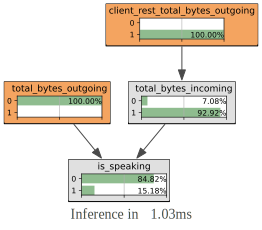

None,None


In [53]:
gnb.sideBySide(gnb.showInference(bn,evs={'client_rest_total_bytes_outgoing': 0, 'total_bytes_outgoing': 1}),
              gnb.showInference(bn,evs={'client_rest_total_bytes_outgoing': 1, 'total_bytes_outgoing': 0}))

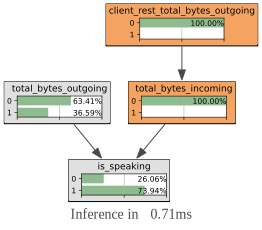

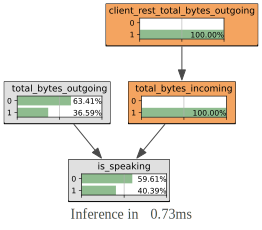

None,None


In [54]:
gnb.sideBySide(gnb.showInference(bn,evs={'client_rest_total_bytes_outgoing': 0, 'total_bytes_incoming': 0}),
              gnb.showInference(bn,evs={'client_rest_total_bytes_outgoing': 1, 'total_bytes_incoming': 1}))

## Client 5 Generalization

In [55]:
df_combined_5 = pd.concat([df5_1, df5_2, df5_3])
df_combined_5['is_speaking'] = 0

# Assuming df_combined is your initial DataFrame
client_ips = ['10.0.1.1', '10.0.2.1', '10.0.3.1', '10.0.4.1', '10.0.5.1']

df_generalized_list = []  # This will store the DataFrame slices for each client

for current_client_ip in client_ips:
    # Filter the DataFrame for the current client
    df_filtered = df_combined_5[df_combined_5['IP'] == current_client_ip].copy()
    
    # Set 'is_speaking' to 1 if the standard outgoing bytes threshold is reached
    df_filtered.loc[df_filtered['std_outgoing_bytes'] >= 20, 'is_speaking'] = 1
    
    # Initialize a column for 'client_rest_total_bytes_outgoing' with zeros
    df_filtered['client_rest_total_bytes_outgoing'] = 0
    
    for other_client_ip in client_ips:
        if other_client_ip != current_client_ip:
            # Add the outgoing bytes from the other client to the 'client_rest_total_bytes_outgoing' column
            df_filtered['client_rest_total_bytes_outgoing'] += df_combined_5[df_combined_5['IP'] == other_client_ip]['total_bytes_outgoing'].values[:len(df_filtered)]

    # Keep only the relevant columns
    df_filtered = df_filtered[['total_bytes_outgoing', 'average_outgoing_bytes', 'total_bytes_incoming', 'client_rest_total_bytes_outgoing', 'is_speaking']]
    
    # Append the processed DataFrame slice to the list
    df_generalized_list.append(df_filtered)

# Concatenate all the DataFrame slices into one DataFrame
df_generalized_5 = pd.concat(df_generalized_list, ignore_index=True)

In [56]:
df_generalized_5['total_bytes_outgoing'] = pd.cut(df_generalized_5['total_bytes_outgoing'], 2, labels=[0, 1])
df_generalized_5['total_bytes_incoming'] = pd.cut(df_generalized_5['total_bytes_incoming'], 2, labels=[0, 1])
df_generalized_5['average_outgoing_bytes'] = pd.cut(df_generalized_5['average_outgoing_bytes'], 2, labels=[0, 1])
df_generalized_5['client_rest_total_bytes_outgoing'] = pd.cut(df_generalized_5['client_rest_total_bytes_outgoing'], 2, labels=[0, 1])
df_generalized_5

,total_bytes_outgoing,average_outgoing_bytes,total_bytes_incoming,client_rest_total_bytes_outgoing,is_speaking
0,1,1,1,0,1
1,1,1,1,1,1
2,1,1,0,0,1
3,1,1,0,0,1
4,1,1,0,0,1
...,...,...,...,...,...
265,0,0,1,1,0
266,0,0,1,1,0
267,0,0,0,1,0
268,0,0,1,1,0


In [57]:
bn = gum.BayesNet('Net')

# Add nodes
tbo = bn.add(gum.LabelizedVariable('total_bytes_outgoing', '', df_generalized_5['total_bytes_outgoing'].nunique()))
tbi = bn.add(gum.LabelizedVariable('total_bytes_incoming', '', df_generalized_5['total_bytes_incoming'].nunique()))
# abo = bn.add(gum.LabelizedVariable('average_outgoing_bytes', '', df_generalized['average_outgoing_bytes'].nunique()))
restbo = bn.add(gum.LabelizedVariable('client_rest_total_bytes_outgoing', '', df_generalized_5['client_rest_total_bytes_outgoing'].nunique()))
is_spk = bn.add(gum.LabelizedVariable('is_speaking', '', 2)) # Assuming 'is_speaking' is binary

# Define the structure of the network manually (this should be based on your domain knowledge)
bn.addArc(restbo, tbi)
bn.addArc(tbo, is_spk)
bn.addArc(tbi, is_spk)
# bn.addArc(abo, is_spk)

# Use BNLearner to learn the parameters from the CSV data
learner = gum.BNLearner(df_generalized_5, bn)
learner.useSmoothingPrior()
bn5 = learner.learnParameters(bn.dag())

In [58]:
explain.showInformation(bn5,{},size="20")

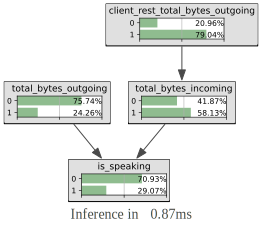

In [59]:
gnb.showInference(bn5,evs={})

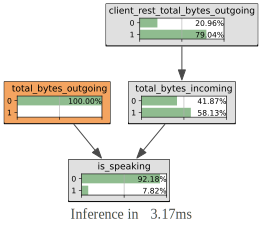

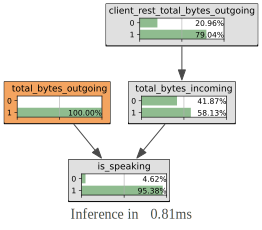

None,None


In [60]:
gnb.sideBySide(gnb.showInference(bn5,evs={'total_bytes_outgoing': 0}), gnb.showInference(bn5,evs={'total_bytes_outgoing': 1}))

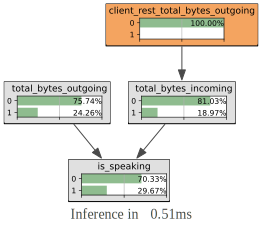

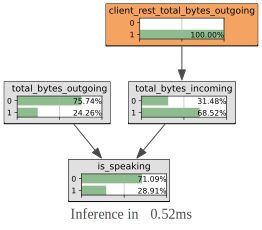

None,None


In [61]:
gnb.sideBySide(gnb.showInference(bn5,evs={'client_rest_total_bytes_outgoing': 0}), 
               gnb.showInference(bn5,evs={'client_rest_total_bytes_outgoing': 1}))

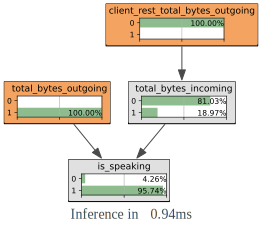

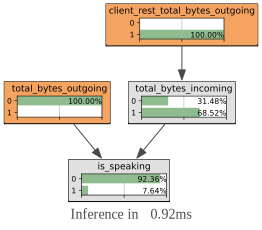

None,None


In [62]:
gnb.sideBySide(gnb.showInference(bn5,evs={'client_rest_total_bytes_outgoing': 0, 'total_bytes_outgoing': 1}),
              gnb.showInference(bn5,evs={'client_rest_total_bytes_outgoing': 1, 'total_bytes_outgoing': 0}))

## Client 8 Generalization

In [63]:
df_combined_8 = pd.concat([df8_1, df8_2, df8_3])
df_combined_8['is_speaking'] = 0

# Assuming df_combined is your initial DataFrame
client_ips = ['10.0.1.1', '10.0.2.1', '10.0.3.1', '10.0.4.1', '10.0.5.1', '10.0.6.1', '10.0.7.1', '10.0.8.1']

df_generalized_list = []  # This will store the DataFrame slices for each client

for current_client_ip in client_ips:
    # Filter the DataFrame for the current client
    df_filtered = df_combined_8[df_combined_8['IP'] == current_client_ip].copy()
    
    # Set 'is_speaking' to 1 if the standard outgoing bytes threshold is reached
    df_filtered.loc[df_filtered['std_outgoing_bytes'] >= 20, 'is_speaking'] = 1
    
    # Initialize a column for 'client_rest_total_bytes_outgoing' with zeros
    df_filtered['client_rest_total_bytes_outgoing'] = 0
    
    for other_client_ip in client_ips:
        if other_client_ip != current_client_ip:
            # Add the outgoing bytes from the other client to the 'client_rest_total_bytes_outgoing' column
            df_filtered['client_rest_total_bytes_outgoing'] += df_combined_8[df_combined_8['IP'] == other_client_ip]['total_bytes_outgoing'].values[:len(df_filtered)]

    # Keep only the relevant columns
    df_filtered = df_filtered[['total_bytes_outgoing', 'average_outgoing_bytes', 'total_bytes_incoming', 'client_rest_total_bytes_outgoing', 'is_speaking']]
    
    # Append the processed DataFrame slice to the list
    df_generalized_list.append(df_filtered)

# Concatenate all the DataFrame slices into one DataFrame
df_generalized_8 = pd.concat(df_generalized_list, ignore_index=True)

In [64]:
df_generalized_8['total_bytes_outgoing'] = pd.cut(df_generalized_8['total_bytes_outgoing'], 2, labels=[0, 1])
df_generalized_8['total_bytes_incoming'] = pd.cut(df_generalized_8['total_bytes_incoming'], 2, labels=[0, 1])
df_generalized_8['average_outgoing_bytes'] = pd.cut(df_generalized_8['average_outgoing_bytes'], 2, labels=[0, 1])
df_generalized_8['client_rest_total_bytes_outgoing'] = pd.cut(df_generalized_8['client_rest_total_bytes_outgoing'], 2, labels=[0, 1])
df_generalized_8

,total_bytes_outgoing,average_outgoing_bytes,total_bytes_incoming,client_rest_total_bytes_outgoing,is_speaking
0,0,0,1,1,0
1,0,0,1,1,0
2,0,0,1,1,0
3,0,0,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
427,0,0,1,1,0
428,0,0,1,1,0
429,0,0,0,1,0
430,0,0,0,1,0


In [65]:
bn = gum.BayesNet('Net')

# Add nodes
tbo = bn.add(gum.LabelizedVariable('total_bytes_outgoing', '', df_generalized_8['total_bytes_outgoing'].nunique()))
tbi = bn.add(gum.LabelizedVariable('total_bytes_incoming', '', df_generalized_8['total_bytes_incoming'].nunique()))
# abo = bn.add(gum.LabelizedVariable('average_outgoing_bytes', '', df_generalized['average_outgoing_bytes'].nunique()))
restbo = bn.add(gum.LabelizedVariable('client_rest_total_bytes_outgoing', '', df_generalized_8['client_rest_total_bytes_outgoing'].nunique()))
is_spk = bn.add(gum.LabelizedVariable('is_speaking', '', 2)) # Assuming 'is_speaking' is binary

# Define the structure of the network manually (this should be based on your domain knowledge)
bn.addArc(restbo, tbi)
bn.addArc(tbo, is_spk)
bn.addArc(tbi, is_spk)
# bn.addArc(abo, is_spk)

# Use BNLearner to learn the parameters from the CSV data
learner = gum.BNLearner(df_generalized_8, bn)
learner.useSmoothingPrior()
bn8 = learner.learnParameters(bn.dag())

In [66]:
explain.showInformation(bn8,{},size="20")

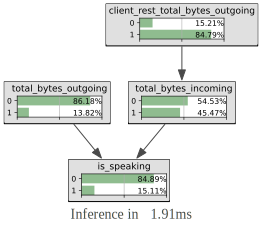

In [67]:
gnb.showInference(bn8,evs={})

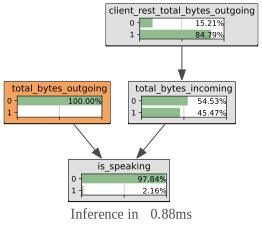

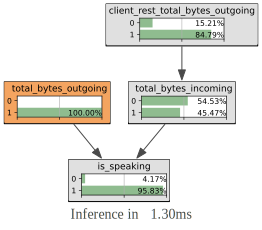

None,None


In [68]:
gnb.sideBySide(gnb.showInference(bn8,evs={'total_bytes_outgoing': 0}), 
               gnb.showInference(bn8,evs={'total_bytes_outgoing': 1}))

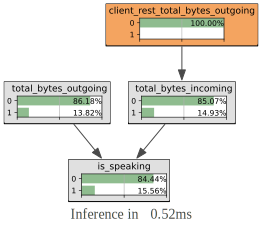

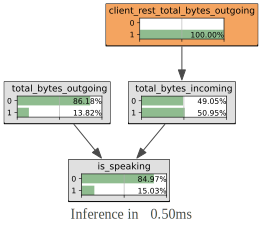

None,None


In [69]:
gnb.sideBySide(gnb.showInference(bn8,evs={'client_rest_total_bytes_outgoing': 0}), 
               gnb.showInference(bn8,evs={'client_rest_total_bytes_outgoing': 1}))

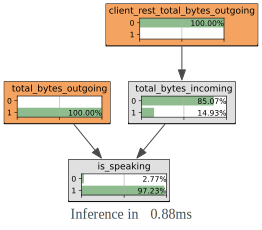

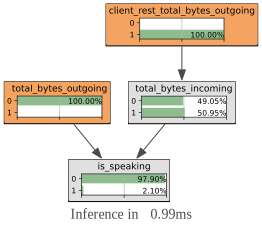

None,None


In [70]:
gnb.sideBySide(gnb.showInference(bn8,evs={'client_rest_total_bytes_outgoing': 0, 'total_bytes_outgoing': 1}),
              gnb.showInference(bn8, evs={'client_rest_total_bytes_outgoing': 1, 'total_bytes_outgoing': 0}))

## Client 3 Standardization

In [72]:
df_combined = pd.concat([df1, df2, df3])
df_combined['is_speaking'] = 0

In [73]:
# Assuming df_combined is your initial DataFrame
client_ips = ['10.0.1.1', '10.0.2.1', '10.0.3.1']

df_generalized_list = []  # This will store the DataFrame slices for each client

for current_client_ip in client_ips:
    # Filter the DataFrame for the current client
    df_filtered = df_combined[df_combined['IP'] == current_client_ip].copy()
    
    # Set 'is_speaking' to 1 if the standard outgoing bytes threshold is reached
    df_filtered.loc[df_filtered['std_outgoing_bytes'] >= 20, 'is_speaking'] = 1
    
    # Initialize a column for 'client_rest_total_bytes_outgoing' with zeros
    df_filtered['client_rest_total_bytes_outgoing'] = 0
    
    for other_client_ip in client_ips:
        if other_client_ip != current_client_ip:
            # Add the outgoing bytes from the other client to the 'client_rest_total_bytes_outgoing' column
            df_filtered['client_rest_total_bytes_outgoing'] += df_combined[df_combined['IP'] == other_client_ip]['total_bytes_outgoing'].values[:len(df_filtered)]

    # Keep only the relevant columns
    df_filtered = df_filtered[['total_bytes_outgoing', 'average_outgoing_bytes', 'total_bytes_incoming', 'client_rest_total_bytes_outgoing', 'is_speaking']]
    
    # Append the processed DataFrame slice to the list
    df_generalized_list.append(df_filtered)

# Concatenate all the DataFrame slices into one DataFrame
df_generalized = pd.concat(df_generalized_list, ignore_index=True)

In [77]:
# Standardization
scaler = StandardScaler()
features_to_scale = ['total_bytes_outgoing', 'average_outgoing_bytes', 'total_bytes_incoming', 'client_rest_total_bytes_outgoing']
df_generalized[features_to_scale] = scaler.fit_transform(df_generalized[features_to_scale])

In [78]:
df_generalized['total_bytes_outgoing'] = pd.cut(df_generalized['total_bytes_outgoing'], 2, labels=[0, 1])
df_generalized['total_bytes_incoming'] = pd.cut(df_generalized['total_bytes_incoming'], 2, labels=[0, 1])
df_generalized['average_outgoing_bytes'] = pd.cut(df_generalized['average_outgoing_bytes'], 2, labels=[0, 1])
df_generalized['client_rest_total_bytes_outgoing'] = pd.cut(df_generalized['client_rest_total_bytes_outgoing'], 2, labels=[0, 1])
df_generalized

,total_bytes_outgoing,average_outgoing_bytes,total_bytes_incoming,client_rest_total_bytes_outgoing,is_speaking
0,0,0,1,1,0
1,0,0,1,1,0
2,0,0,1,1,1
3,1,1,0,0,1
4,1,1,0,0,1
...,...,...,...,...,...
157,0,0,1,1,0
158,0,0,1,1,0
159,0,0,1,1,0
160,0,0,1,1,0


In [79]:
bn = gum.BayesNet('Net')

# Add nodes
tbo = bn.add(gum.LabelizedVariable('total_bytes_outgoing', '', df_generalized['total_bytes_outgoing'].nunique()))
tbi = bn.add(gum.LabelizedVariable('total_bytes_incoming', '', df_generalized['total_bytes_incoming'].nunique()))
# abo = bn.add(gum.LabelizedVariable('average_outgoing_bytes', '', df_generalized['average_outgoing_bytes'].nunique()))
restbo = bn.add(gum.LabelizedVariable('client_rest_total_bytes_outgoing', '', df_generalized['client_rest_total_bytes_outgoing'].nunique()))
is_spk = bn.add(gum.LabelizedVariable('is_speaking', '', 2)) # Assuming 'is_speaking' is binary

# Define the structure of the network manually (this should be based on your domain knowledge)
bn.addArc(restbo, tbi)
bn.addArc(tbo, is_spk)
bn.addArc(tbi, is_spk)
# bn.addArc(abo, is_spk)

# Use BNLearner to learn the parameters from the CSV data
learner = gum.BNLearner(df_generalized, bn)
learner.useSmoothingPrior()
bn = learner.learnParameters(bn.dag())

In [80]:
explain.showInformation(bn,{},size="20")

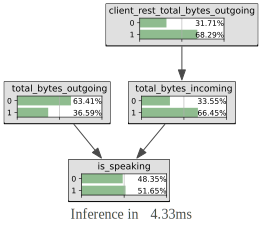

In [81]:
gnb.showInference(bn,evs={})

## Client 5 Standardization

In [82]:
df_combined_5 = pd.concat([df5_1, df5_2, df5_3])
df_combined_5['is_speaking'] = 0

# Assuming df_combined is your initial DataFrame
client_ips = ['10.0.1.1', '10.0.2.1', '10.0.3.1', '10.0.4.1', '10.0.5.1']

df_generalized_list = []  # This will store the DataFrame slices for each client

for current_client_ip in client_ips:
    # Filter the DataFrame for the current client
    df_filtered = df_combined_5[df_combined_5['IP'] == current_client_ip].copy()
    
    # Set 'is_speaking' to 1 if the standard outgoing bytes threshold is reached
    df_filtered.loc[df_filtered['std_outgoing_bytes'] >= 20, 'is_speaking'] = 1
    
    # Initialize a column for 'client_rest_total_bytes_outgoing' with zeros
    df_filtered['client_rest_total_bytes_outgoing'] = 0
    
    for other_client_ip in client_ips:
        if other_client_ip != current_client_ip:
            # Add the outgoing bytes from the other client to the 'client_rest_total_bytes_outgoing' column
            df_filtered['client_rest_total_bytes_outgoing'] += df_combined_5[df_combined_5['IP'] == other_client_ip]['total_bytes_outgoing'].values[:len(df_filtered)]

    # Keep only the relevant columns
    df_filtered = df_filtered[['total_bytes_outgoing', 'average_outgoing_bytes', 'total_bytes_incoming', 'client_rest_total_bytes_outgoing', 'is_speaking']]
    
    # Append the processed DataFrame slice to the list
    df_generalized_list.append(df_filtered)

# Concatenate all the DataFrame slices into one DataFrame
df_generalized_5 = pd.concat(df_generalized_list, ignore_index=True)

In [83]:
# Standardization
scaler = StandardScaler()
features_to_scale = ['total_bytes_outgoing', 'average_outgoing_bytes', 'total_bytes_incoming', 'client_rest_total_bytes_outgoing']
df_generalized_5[features_to_scale] = scaler.fit_transform(df_generalized_5[features_to_scale])

In [84]:
df_generalized_5['total_bytes_outgoing'] = pd.cut(df_generalized_5['total_bytes_outgoing'], 2, labels=[0, 1])
df_generalized_5['total_bytes_incoming'] = pd.cut(df_generalized_5['total_bytes_incoming'], 2, labels=[0, 1])
df_generalized_5['average_outgoing_bytes'] = pd.cut(df_generalized_5['average_outgoing_bytes'], 2, labels=[0, 1])
df_generalized_5['client_rest_total_bytes_outgoing'] = pd.cut(df_generalized_5['client_rest_total_bytes_outgoing'], 2, labels=[0, 1])
df_generalized_5

,total_bytes_outgoing,average_outgoing_bytes,total_bytes_incoming,client_rest_total_bytes_outgoing,is_speaking
0,1,1,1,0,1
1,1,1,1,1,1
2,1,1,0,0,1
3,1,1,0,0,1
4,1,1,0,0,1
...,...,...,...,...,...
265,0,0,1,1,0
266,0,0,1,1,0
267,0,0,0,1,0
268,0,0,1,1,0


In [85]:
bn = gum.BayesNet('Net')

# Add nodes
tbo = bn.add(gum.LabelizedVariable('total_bytes_outgoing', '', df_generalized_5['total_bytes_outgoing'].nunique()))
tbi = bn.add(gum.LabelizedVariable('total_bytes_incoming', '', df_generalized_5['total_bytes_incoming'].nunique()))
# abo = bn.add(gum.LabelizedVariable('average_outgoing_bytes', '', df_generalized['average_outgoing_bytes'].nunique()))
restbo = bn.add(gum.LabelizedVariable('client_rest_total_bytes_outgoing', '', df_generalized_5['client_rest_total_bytes_outgoing'].nunique()))
is_spk = bn.add(gum.LabelizedVariable('is_speaking', '', 2)) # Assuming 'is_speaking' is binary

# Define the structure of the network manually (this should be based on your domain knowledge)
bn.addArc(restbo, tbi)
bn.addArc(tbo, is_spk)
bn.addArc(tbi, is_spk)
# bn.addArc(abo, is_spk)

# Use BNLearner to learn the parameters from the CSV data
learner = gum.BNLearner(df_generalized_5, bn)
learner.useSmoothingPrior()
bn5 = learner.learnParameters(bn.dag())

In [87]:
explain.showInformation(bn5,{},size="20")

**Obervations**
- Standardization does not change relationships. Discretization segments continous variables into 2 bins and standardization does not really change the segments.